In [108]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adagrad
from utility.utils import read_data, generate_datasets
from sklearn.preprocessing import normalize
import pandas as pd

"""
This version 2 will attempt to use keras to create a multi-layer neural network
to predict the next price of a particular cryptocurrency given the current
price, volume, high price, low price of a given timestep
"""


data = read_data('crypto-test-data-82hrs.csv')
data = data[data['ticker'] == 'ETHBTC']
data['timestamp'] = pd.to_datetime(data.timestamp)
data = data[['high', 'low', 'price', 'volume', 'timestamp']].sort_values(by='timestamp')
data = data.set_index('timestamp')


In [2]:
X_train, X_test, Y_train, Y_test = generate_datasets(data)

In [3]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('Y_train shape: ' + str(Y_train.shape))
print(X_train[0:5])
print(Y_train[0:5])
print('------------------')
print(X_test[0:5])
print(Y_test[0:5])

X_train shape: (19864, 4)
X_test shape: (9784, 4)
Y_train shape: (19864, 1)
[[5.87521225e-03 5.87288841e-03 5.87358036e-03 8.33919805e-05]
 [5.67864656e-03 5.68291300e-03 5.68070172e-03 6.15133183e-03]
 [5.91014410e-03 5.90832385e-03 5.90919442e-03 1.17209053e-03]
 [5.72475365e-03 5.72241723e-03 5.72638545e-03 7.62170212e-04]
 [5.68863766e-03 5.69179036e-03 5.69121565e-03 3.13369735e-03]]
[[0.0058715 ]
 [0.00568449]
 [0.00590806]
 [0.00572393]
 [0.00569041]]
------------------
[[0.00568782 0.00568595 0.00568951 0.00041191]
 [0.00583421 0.0058342  0.00583537 0.0020468 ]
 [0.00587691 0.0058757  0.00587314 0.00140268]
 [0.00590467 0.00590241 0.00590401 0.00104339]
 [0.00567939 0.00568069 0.00568189 0.00230835]]
[[0.00568708]
 [0.00583406]
 [0.00587646]
 [0.00590525]
 [0.00567931]]


In [129]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(Y_train.shape[1]))
# model.compile(optimizer=SGD(lr=0.03), loss='mse') # Stochastic Gradient Descent
model.compile(optimizer=Adagrad(lr=0.05, decay=0.05), loss='mse') # Adam
# model.fit(X_train, Y_train, epochs=1, batch_size=X_train.shape[1])
model.fit(X_train, Y_train, epochs=10, batch_size=16)


# model.fit(X_train, Y_train, epochs=100, batch_size=X_train.shape[0])

Epoch 1/10
19864/19864 [==============================] - 4s 199us/step - loss: 2.8561e-05
Epoch 2/10
19864/19864 [==============================] - 3s 127us/step - loss: 8.3552e-07
Epoch 3/10
19864/19864 [==============================] - 3s 127us/step - loss: 7.9409e-07
Epoch 4/10
19864/19864 [==============================] - 2s 126us/step - loss: 7.7041e-07
Epoch 5/10
19864/19864 [==============================] - 3s 127us/step - loss: 7.5483e-07
Epoch 6/10
19864/19864 [==============================] - 3s 134us/step - loss: 7.4324e-07
Epoch 7/10
19864/19864 [==============================] - 3s 129us/step - loss: 7.3410e-07
Epoch 8/10
19864/19864 [==============================] - 3s 126us/step - loss: 7.2681e-07
Epoch 9/10
19864/19864 [==============================] - 3s 126us/step - loss: 7.2065e-07
Epoch 10/10
19864/19864 [==============================] - 3s 135us/step - loss: 7.1541e-07


In [124]:
model.evaluate(X_test, Y_test, batch_size=16)

9784/9784 [==============================] - 1s 59us/step


6.954127900582429e-09

In [125]:
y_hat = model.predict(X_train, batch_size=16)

In [73]:
y_hat.shape

(19864, 1)

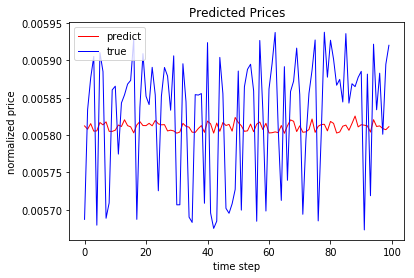

In [128]:
import matplotlib.pyplot as plt
import numpy as np
m = X_train.shape[0]
# n = len(parameters) // 2  # number of layers in the neural network, not used
p = np.zeros((m, 1))

for i in range(0, y_hat.shape[0]):
    p[i, 0] = y_hat[i, 0]

# print results
# print ("predictions: " + str(p[:10]))
# print ("true labels: " + str(y[:10]))

plt.plot(np.squeeze(p)[0:100], marker=None,
         color='red', markersize=1, linewidth=1)
plt.plot(np.squeeze(Y_test)[0:100], marker=None,
         color='blue', markersize=1, linewidth=1)
plt.ylabel('normalized price')
plt.xlabel('time step')
plt.title("Predicted Prices")
plt.legend(['predict', 'true'], loc='upper left')
plt.show()